In [89]:
ECFP_PATH = '../results/latent_vectors_20241218_114911/preds_20241222-115947/predictions.csv'
KRFP_PATH = '../results/latent_vectors_20241218_114927/preds_20241222-114212/predictions.csv'

import pandas as pd
df_ECFP = pd.read_csv(ECFP_PATH)
df_KRFP = pd.read_csv(KRFP_PATH)

/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

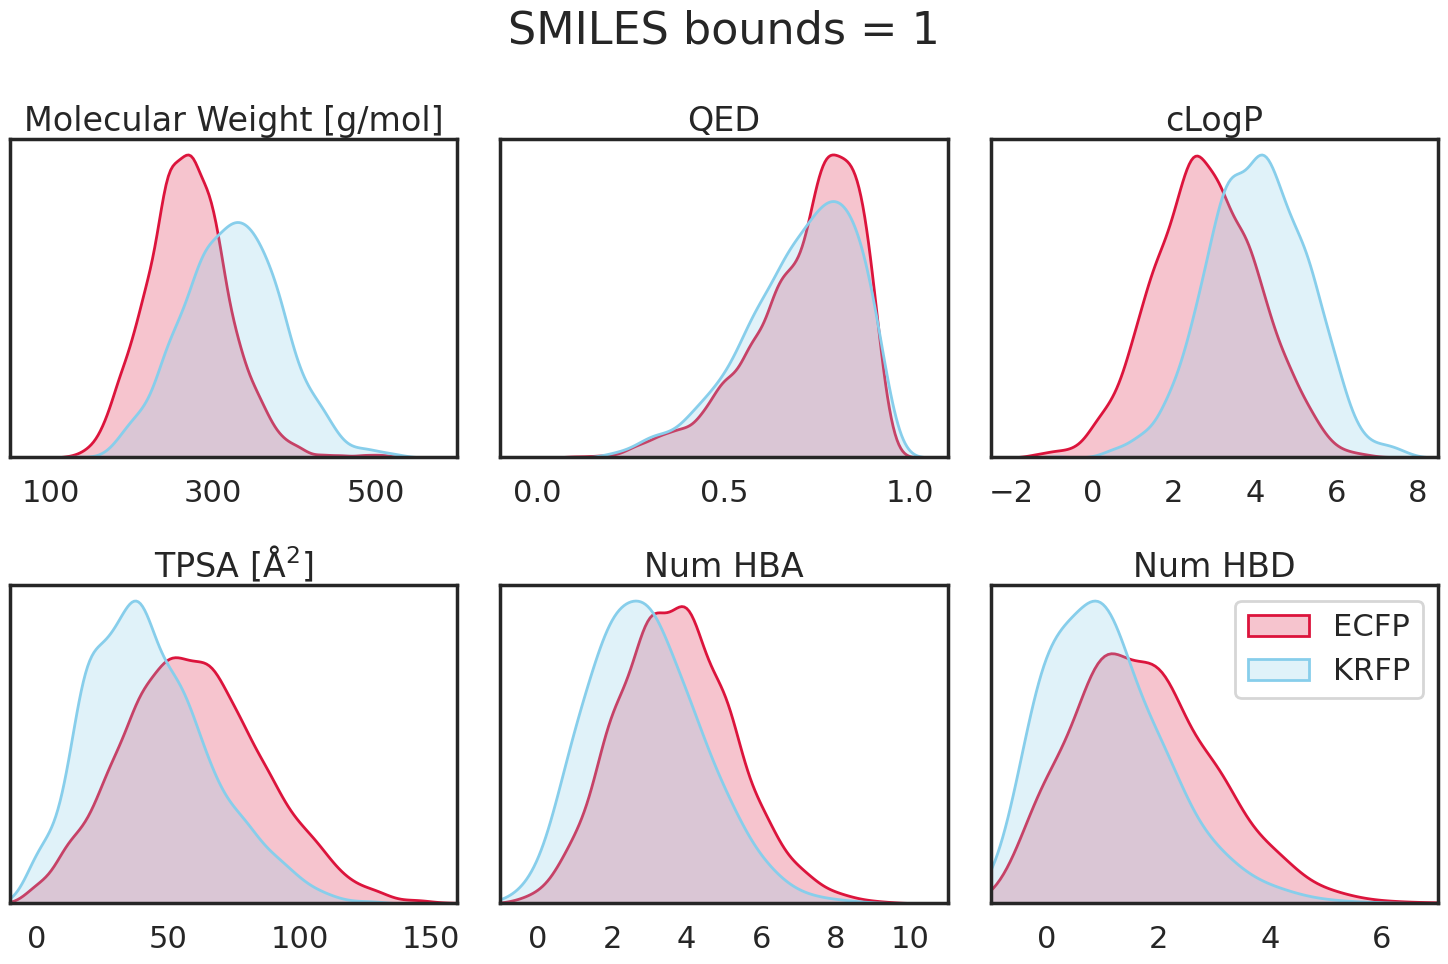

In [92]:
# plot kde of qed, mol_wt, logP, tpsa, num_HBA, num_HBD

COLOR_ECFP = 'crimson'
COLOR_KRFP = 'skyblue'

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('poster')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('SMILES bounds = 1', fontsize=32)


sns.kdeplot(df_ECFP['mol_wt'], ax=axes[0, 0], color=COLOR_ECFP, fill=True)
sns.kdeplot(df_KRFP['mol_wt'], ax=axes[0, 0], color=COLOR_KRFP, fill=True)
axes[0, 0].set_title('Molecular Weight [g/mol]')
axes[0, 0].set_xlim(50, 600)
axes[0, 0].set_xticks(range(100, 610, 200))

sns.kdeplot(df_ECFP['qed'], ax=axes[0, 1], color=COLOR_ECFP, fill=True, common_norm=True)
sns.kdeplot(df_KRFP['qed'], ax=axes[0, 1], color=COLOR_KRFP, fill=True, common_norm=True)
axes[0, 1].set_title('QED')
axes[0, 1].set_xlim(-0.1, 1.1)
axes[0, 1].set_xticks([0, 0.5, 1])

sns.kdeplot(df_ECFP['logP'], ax=axes[0, 2], color=COLOR_ECFP, fill=True)
sns.kdeplot(df_KRFP['logP'], ax=axes[0, 2], color=COLOR_KRFP, fill=True)
axes[0, 2].set_title('cLogP')
axes[0, 2].set_xlim(-2.5, 8.5)
axes[0, 2].set_xticks(range(-2, 9, 2))

sns.kdeplot(df_ECFP['tpsa'], ax=axes[1, 0], color=COLOR_ECFP, fill=True)
sns.kdeplot(df_KRFP['tpsa'], ax=axes[1, 0], color=COLOR_KRFP, fill=True)
axes[1, 0].set_title('TPSA [Å$^{2}$]')
axes[1, 0].set_xlim(-10, 160)

sns.kdeplot(df_ECFP['num_HBA'], ax=axes[1, 1], color=COLOR_ECFP, fill=True, bw_adjust=1.8)
sns.kdeplot(df_KRFP['num_HBA'], ax=axes[1, 1], color=COLOR_KRFP, fill=True, bw_adjust=1.8)
axes[1, 1].set_title('Num HBA')
axes[1, 1].set_xlim(-1, 11)
axes[1, 1].set_xticks(range(0, 11, 2))

sns.kdeplot(df_ECFP['num_HBD'], ax=axes[1, 2], color=COLOR_ECFP, fill=True, bw_adjust=2.2)
sns.kdeplot(df_KRFP['num_HBD'], ax=axes[1, 2], color=COLOR_KRFP, fill=True, bw_adjust=2.2)
axes[1, 2].set_title('Num HBD')
axes[1, 2].set_xlim(-1, 7)
axes[1, 2].set_xticks(range(0, 7, 2))
# display legend
axes[1, 2].legend(['ECFP', 'KRFP'], loc='upper right')

# hide y-axis labels and ticks
for ax in axes.flatten():
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')

# move the subplots a bit further apart
plt.tight_layout()

plt.savefig('kde_bounds1.png')